In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
from pymatreader import read_mat
import IPython
from pathlib import Path
from utilities import savefig, FKFit
from dataclasses import dataclass
from typing import Callable
from scipy.optimize import curve_fit
import inspect
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2

In [3]:
NB_NAME = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"]).stem

In [47]:
DATAPATH = os.path.join(os.path.abspath(""), "data", NB_NAME)

fnames = os.listdir(DATAPATH)
fnames = [os.path.join(DATAPATH, fname) for fname in fnames]

resistances = []
powers = []
counts = []
currents = []

for fname in fnames:
    data = read_mat(fname)["Data"]
    if data["Resistance"] == 975000:
        data["Resistance"] = 97500
    powerlist = data["PowerList"] * 1e6
    
    resistances.append(data["Resistance"])
    counts.append(data["MeasureCounts"])
    powers.append(1e6 * data["PowerMeasured"])
    currents.append(1e6 * data["MeasureCurrent"])

resistances = np.array(resistances)
res_sort_idc = np.argsort(resistances)

resistances = np.array(resistances)[res_sort_idc]
powers = np.array(powers)[res_sort_idc]
counts = np.array(counts)[res_sort_idc]
currents = np.array(currents)[res_sort_idc]
    

/home/ali/miniconda3/envs/university/lib/python3.11/site-packages/pymatreader/utils.py:291: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn(


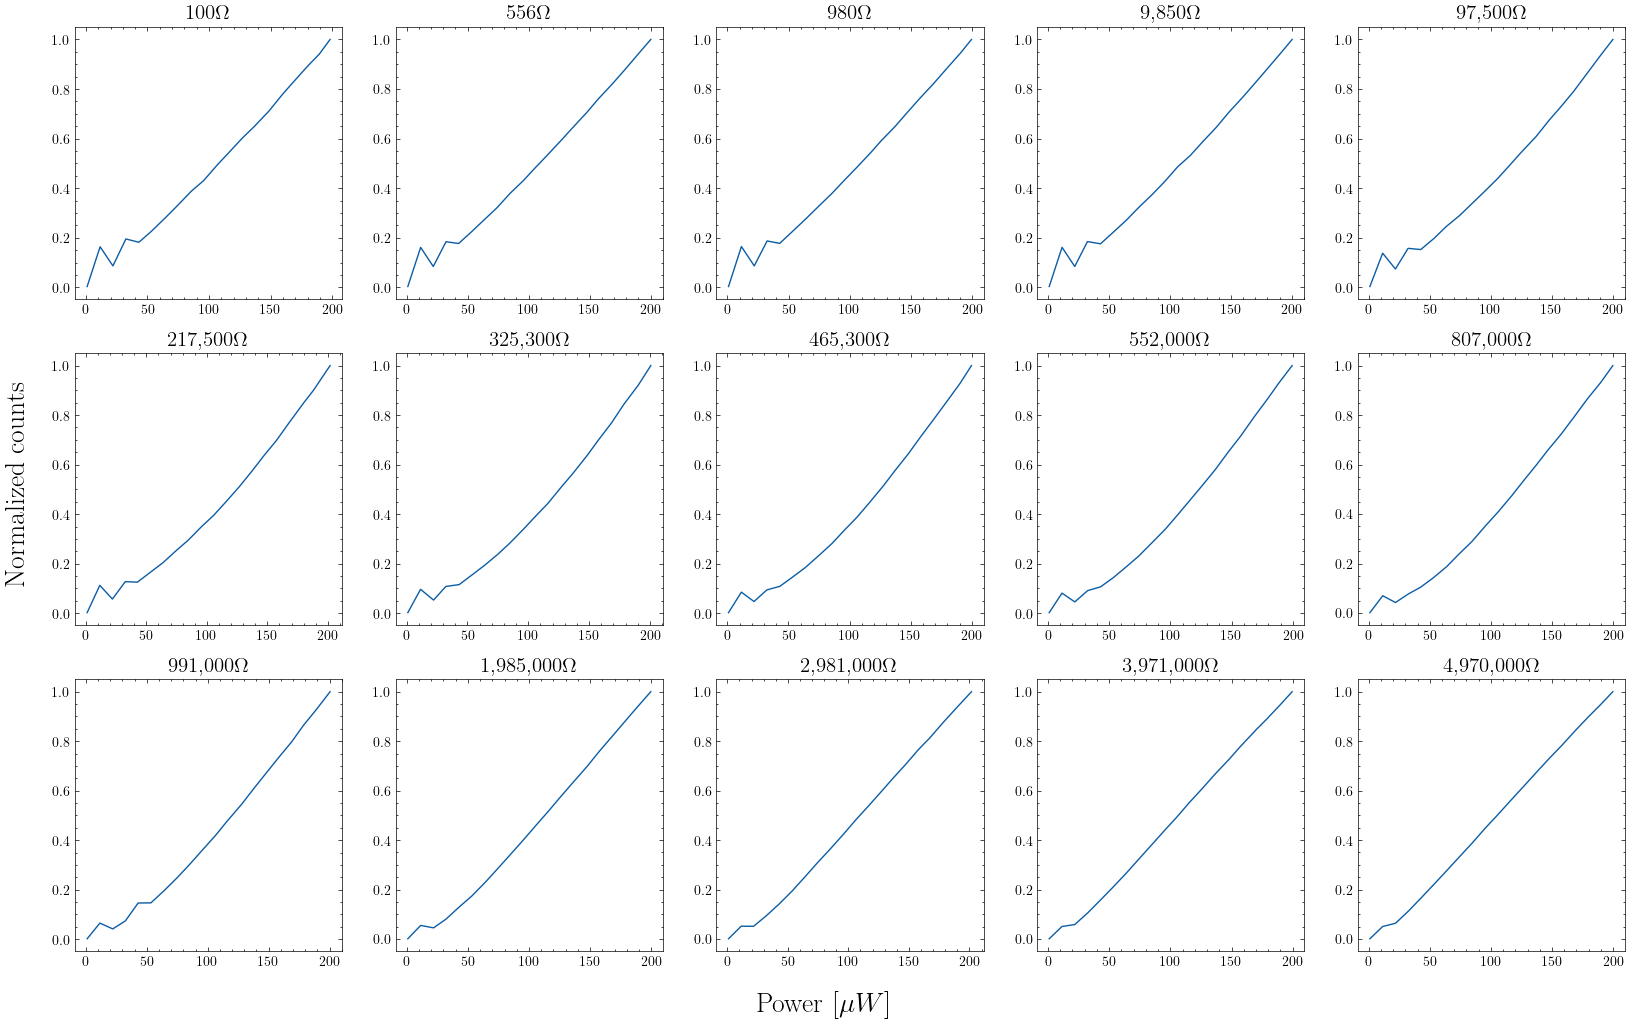

In [5]:
fig, axs = plt.subplots(3, 5, figsize=(20,12))
for i in range(len(resistances)):
    axs.ravel()[i].set_title(fr"{int(resistances[i]):,}$\Omega$", fontsize=15)
    axs.ravel()[i].plot(powers[i], counts[i] / np.max(counts[i]))
fig.text(0.5, 0.06, r'Power [$\mu W$]', ha='center', fontsize=20)
fig.text(0.09, 0.5, 'Normalized counts', va='center', rotation='vertical', fontsize=20)
savefig(NB_NAME, "P_I_all_R", fig)
plt.show()

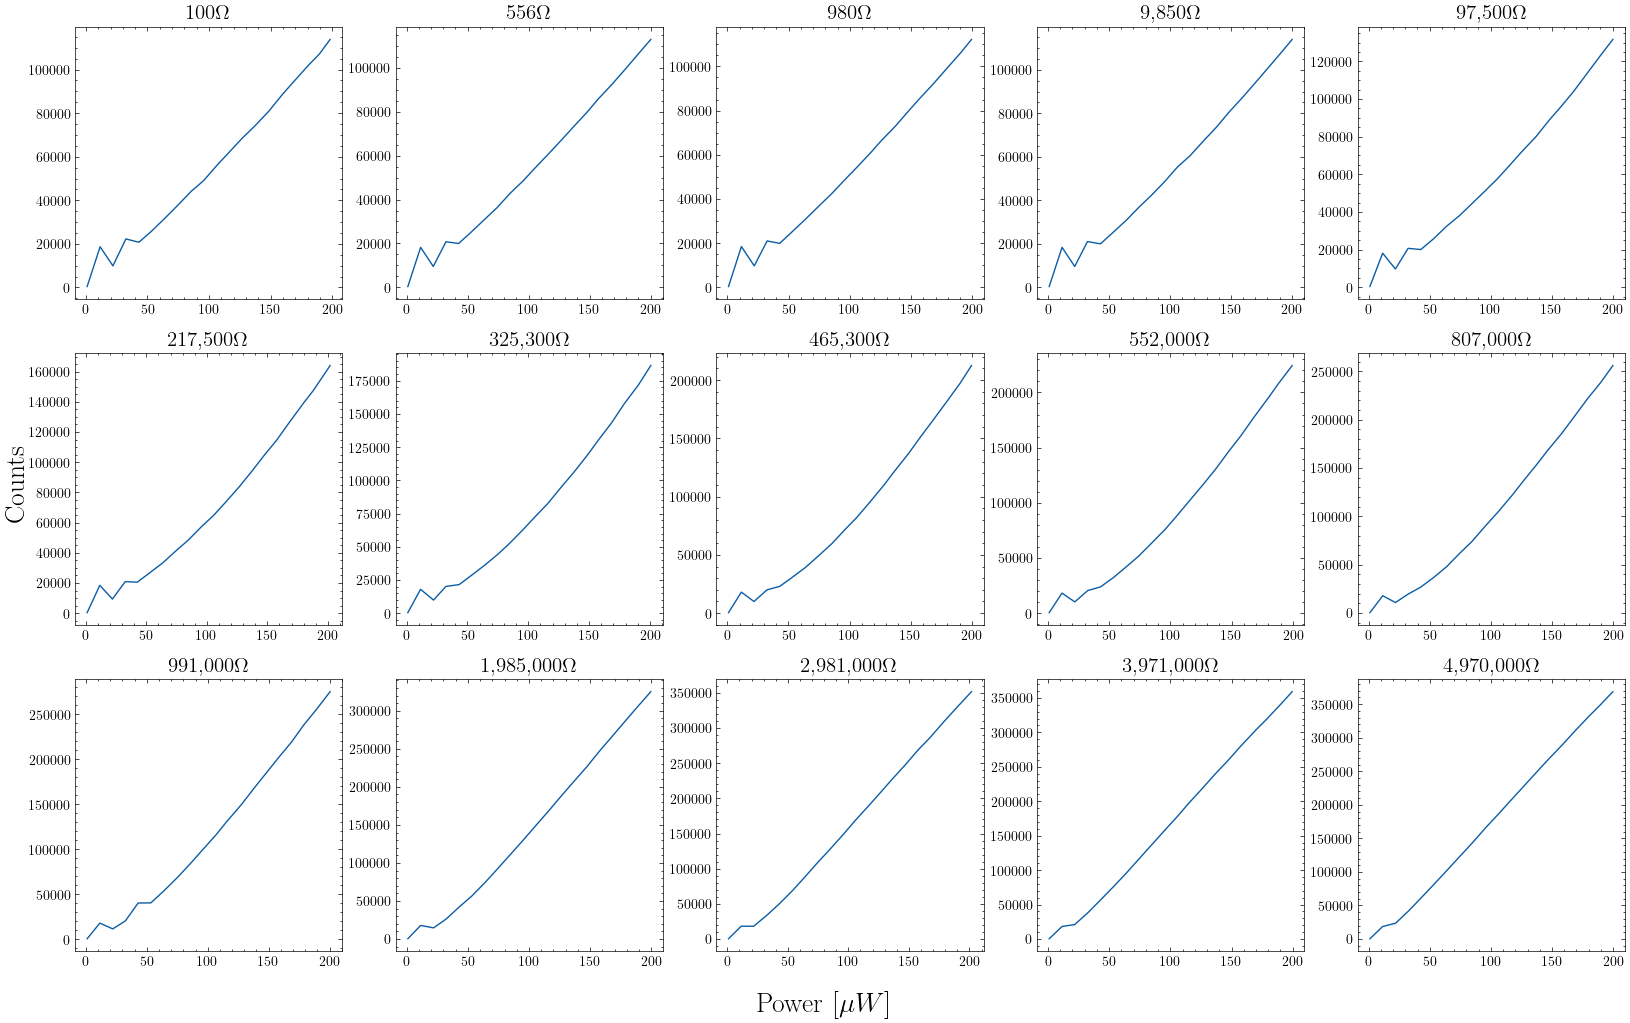

In [6]:
fig, axs = plt.subplots(3, 5, figsize=(20,12))
for i in range(len(resistances)):
    axs.ravel()[i].set_title(fr"{int(resistances[i]):,}$\Omega$", fontsize=15)
    axs.ravel()[i].plot(powers[i], counts[i])
fig.text(0.5, 0.06, r'Power [$\mu W$]', ha='center', fontsize=20)
fig.text(0.09, 0.5, 'Counts', va='center', rotation='vertical', fontsize=20)
# savefig(NB_NAME, "P_I_all_R", fig)
plt.show()

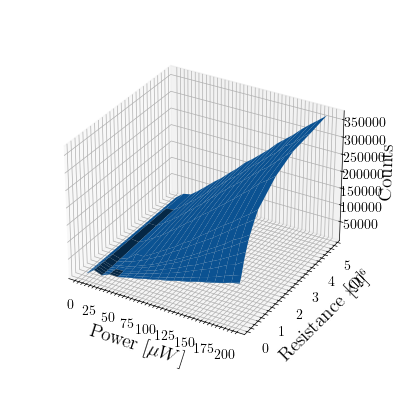

In [7]:
fig = plt.figure(figsize=(5, 4), layout="compressed")
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Resistance [$\Omega$]", fontsize=14)
ax.set_zlabel(r"Counts", fontsize=14)
ax.plot_surface(*np.meshgrid(np.linspace(1, 200, 20), resistances), counts)
ax.set_box_aspect(None, zoom=0.8)

Text(0, 0.5, 'Resistance [$\\Omega$]')

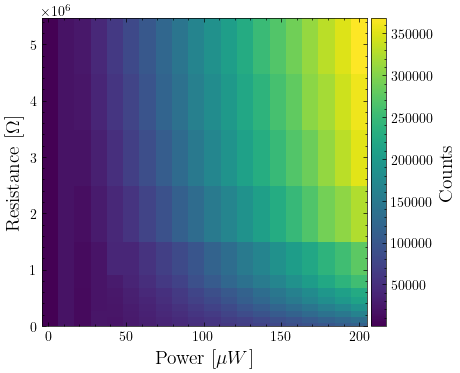

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
pcm = ax.pcolormesh(np.linspace(1, 200, 20), resistances, counts)
cb = fig.colorbar(pcm, ax=ax, pad = 0.01)
cb.set_label(r"Counts", fontsize=14)
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Resistance [$\Omega$]", fontsize=14)

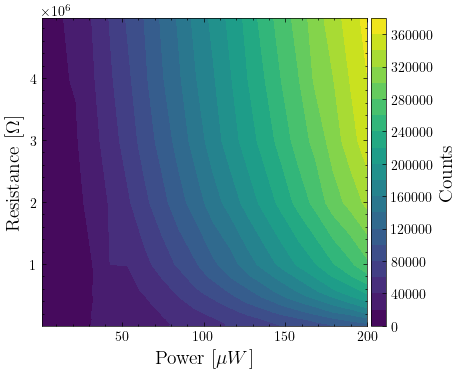

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
pcm = ax.contourf(np.linspace(1, 200, 20), resistances, counts, levels=20)
cb = fig.colorbar(pcm, ax=ax, pad = 0.01)
cb.set_label(r"Counts", fontsize=14)
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Resistance [$\Omega$]", fontsize=14)
savefig(NB_NAME, "IPR_2d", fig)
plt.show()

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
pcm = ax.pcolormesh(np.linspace(1, 200, 20), resistances, np.abs(currents))
cb = fig.colorbar(pcm, ax=ax, pad = 0.01)
cb.set_label(r"Current [$\mu A$]", fontsize=14)
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Resistance [$\Omega$]", fontsize=14)Omega

SyntaxError: invalid syntax (4100530044.py, line 6)

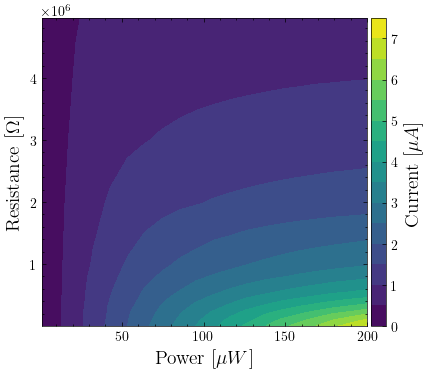

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
pcm = ax.contourf(np.linspace(1, 200, 20), resistances, np.abs(currents), levels=15)
cb = fig.colorbar(pcm, ax=ax, pad = 0.01)
cb.set_label(r"Current [$\mu A$]", fontsize=14)
ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel(r"Resistance [$\Omega$]", fontsize=14)
# savefig(NB_NAME, "CPR_2D", fig)
plt.show()

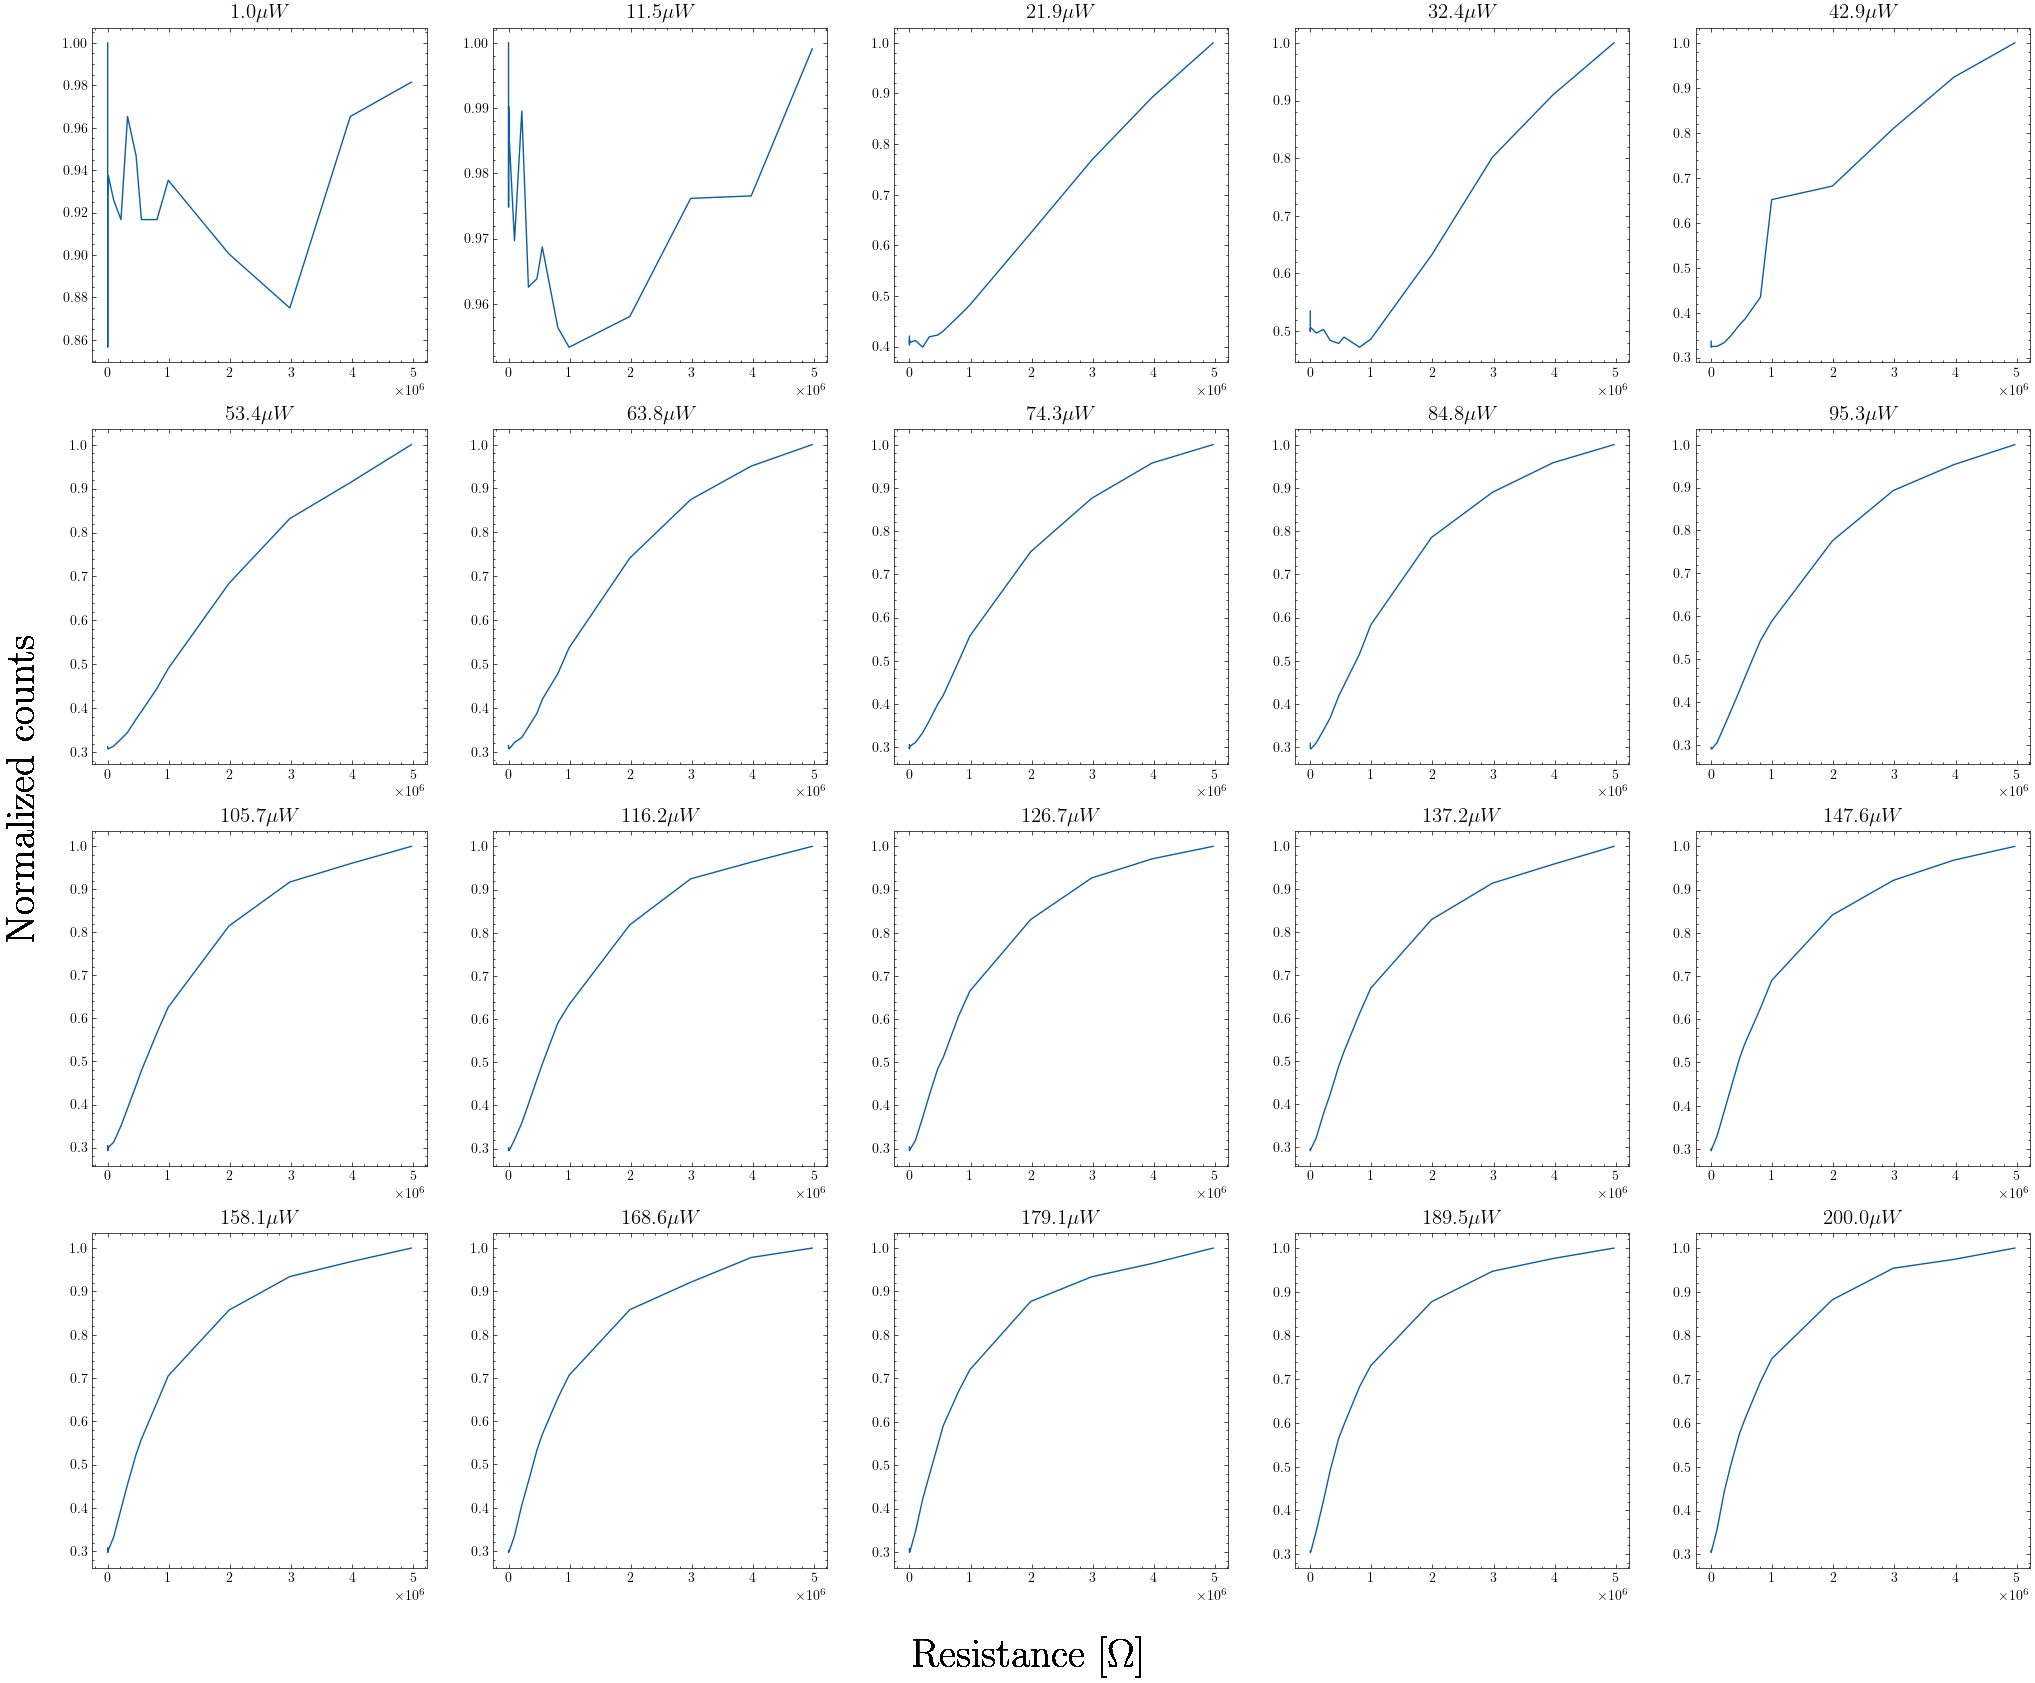

In [12]:
fig, axs = plt.subplots(4, 5, figsize=(25, 20))
for i in range(counts.shape[1]):
    axs.ravel()[i].plot(resistances, counts[:, i] / np.max(counts[:, i]))
    axs.ravel()[i].set_title(fr"{np.linspace(1, 200, 20)[i]:.1f}$\mu W$", fontsize=15)
    fig.text(0.5, 0.06, r'Resistance [$\Omega$]', ha='center', fontsize=30)
    fig.text(0.09, 0.5, 'Normalized counts', va='center', rotation='vertical', fontsize=30)
savefig(NB_NAME, "I_R_all_P", fig)
plt.show()

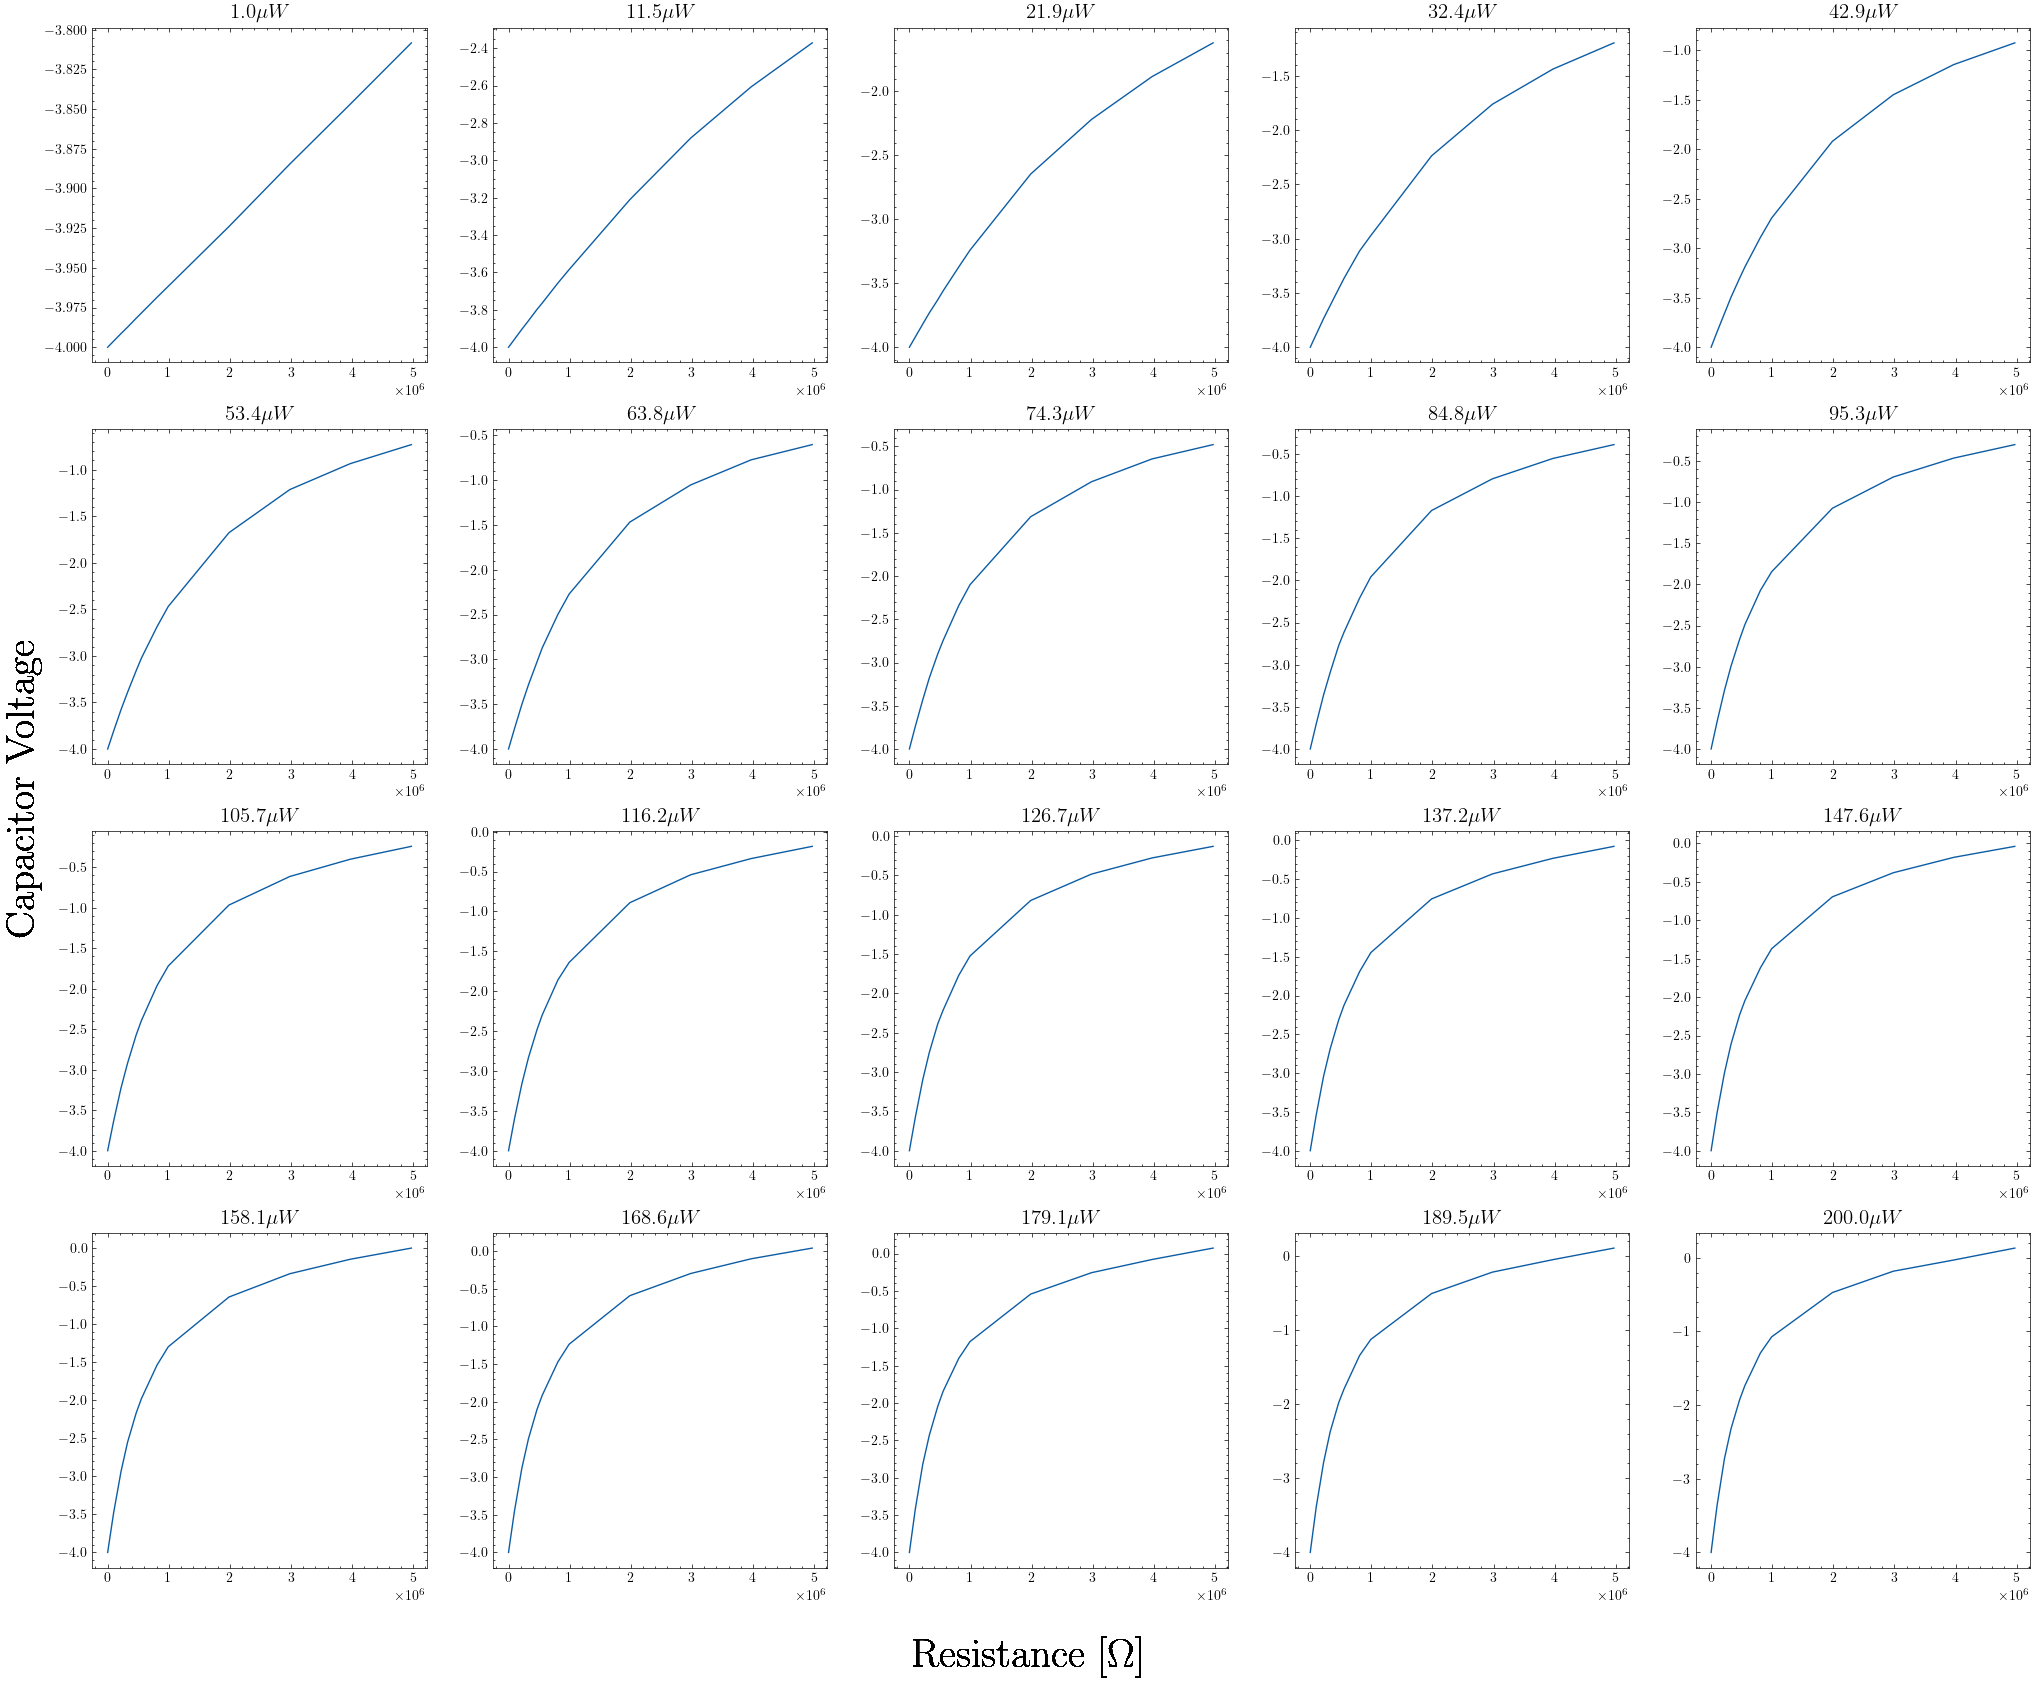

In [14]:
fig, axs = plt.subplots(4, 5, figsize=(25, 20))
for i in range(counts.shape[1]):
    axs.ravel()[i].plot(resistances, -4 - currents[:, i] * resistances*1e-6)
    axs.ravel()[i].set_title(fr"{np.linspace(1, 200, 20)[i]:.1f}$\mu W$", fontsize=15)
    fig.text(0.5, 0.06, r'Resistance [$\Omega$]', ha='center', fontsize=30)
    fig.text(0.09, 0.5, 'Capacitor Voltage', va='center', rotation='vertical', fontsize=30)
savefig(NB_NAME, "cap_I_R_all_P", fig)
plt.show()

In [22]:
@dataclass
class FitInput:
    power: np.ndarray
    counts: np.ndarray
    error: np.ndarray
    fit_func: Callable
    initial_guesses: list[float]

    @classmethod
    def build_fitinputs(
        cls,
        powers: np.ndarray,
        counts: np.ndarray,
        errors: np.ndarray,
        fit_func: Callable,
        initial_guesses: list[float],
    ):
        fit_inputs = []
        for i in range(len(powers)):
            if i == 0:
                fit_inputs.append(
                    FitInput(powers[i], counts[i], errors[i], fit_func, initial_guesses)
                )
            else:
                fit_inputs.append(
                    FitInput(powers[i], counts[i], errors[i], fit_func, [])
                )
        return fit_inputs
    
    @classmethod
    def build_from_fk_fit(
        cls,
        powers: np.ndarray,
        counts: np.ndarray,
        errors: np.ndarray,
        initial_guesses: list[float],
        resistances: float,
        L: float,
        lam: float,
        x: float,
        T: float,
        V_app: float,
    ):
        fit_inputs = []
        for i in range(len(powers)):
            fk_fit = FKFit(powers[i], resistances[i], L, lam, x, T, V_app)
            fit_inputs.append(FitInput(powers[i], counts[i] / np.max(counts[i]), errors[i] / np.max(counts[i]), fk_fit.FK_fit_power_scaled, initial_guesses))
        return fit_inputs
@dataclass
class FitResult:
    parameters: list[float]
    parameter_errors: list[float]
    chi2: float
    ndof: float
    p_value: float
    success: bool


def perform_activation_fit(fit_input: FitInput, outlier: int | list[int] | None = None):
    if (
        len(fit_input.initial_guesses)
        != len(inspect.signature(fit_input.fit_func).parameters) - 1
    ):
        raise ValueError("Initial guesses must match # of fit function arguments.")
    if outlier:
        P_I_lstsq = LeastSquares(
            np.delete(fit_input.power, outlier),
            np.delete(fit_input.counts, outlier),
            np.delete(fit_input.error, outlier),
            fit_input.fit_func,
        )
    else:
        P_I_lstsq = LeastSquares(
            fit_input.power, fit_input.counts, fit_input.error, fit_input.fit_func, loss="soft_l1"
        )
    P_I_minuit = Minuit(P_I_lstsq, *fit_input.initial_guesses)
    P_I_minuit.migrad()
    P_I_minuit.hesse()

    chi2_val = P_I_minuit.fval
    if outlier:
        ndof = len(np.delete(fit_input.power, outlier)) - P_I_minuit.nfit
    else:
        ndof = len(fit_input.power) - P_I_minuit.nfit
    p_val = chi2.sf(P_I_minuit.fval, ndof)
    success = P_I_minuit.accurate and P_I_minuit.valid

    return FitResult(
        P_I_minuit.values[:], P_I_minuit.errors[:], chi2_val, ndof, p_val, success
    )


def all_activation_fits(
    fit_inputs: list[FitInput], outliers: list[int | list[int]] | None = None, opt_rounds=10,
):
    fit_results = []

    for idx in range(len(fit_inputs)):
        for _ in range(opt_rounds):
            if outliers:
                # fit_result = perform_activation_fit(
                #     fit_inputs[idx], outliers[idx]
                # )
                try:
                    par, _ = curve_fit(
                        fit_inputs[idx].fit_func,
                        np.delete(fit_inputs[idx].power, outliers[idx]),
                        np.delete(fit_inputs[idx].counts, outliers[idx]),
                        fit_inputs[idx].initial_guesses,
                        np.delete(fit_inputs[idx].error, outliers[idx]),
                    )
                except Exception as e:
                    par = perform_activation_fit(fit_inputs[idx], outliers[idx]).parameters

            else:
                try:
                    par, _ = curve_fit(
                        fit_inputs[idx].fit_func,
                        fit_inputs[idx].power,
                        fit_inputs[idx].counts,
                        fit_inputs[idx].initial_guesses,
                        fit_inputs[idx].error,
                    )
                except Exception as e:
                    par = perform_activation_fit(fit_inputs[idx]).parameters

            fit_inputs[idx].initial_guesses = par

        if outliers:
            fit_result = perform_activation_fit(fit_inputs[idx], outliers[idx])
        else:
            fit_result = perform_activation_fit(fit_inputs[idx])

        fit_results.append(fit_result)

        if not fit_result.success:
            print(f"NOTE: fit {idx} was not completely successful")

        if (idx < len(fit_inputs) - 1) and (opt_rounds > 0):
            fit_inputs[idx + 1].initial_guesses = fit_result.parameters
    return fit_results


def plot_all_activation_fits(
    fit_inputs: list[FitInput],
    fit_results: list[FitResult],
    resistances: np.ndarray,
    outliers: list[int | list[int]] | None = None,
):
    fig, axs = plt.subplots(3, 5, figsize=(20, 12))
    for i in range(len(resistances)):
        axs.ravel()[i].set_title(rf"{int(resistances[i]):,}$\Omega$", fontsize=15)
        if outliers:
            axs.ravel()[i].errorbar(
                np.delete(fit_inputs[i].power, outliers[i]),
                np.delete(fit_inputs[i].counts, outliers[i]),
                fmt=".k",
                yerr=np.delete(fit_inputs[i].error, outliers[i]),
                label="Data",
            )
            axs.ravel()[i].plot(
                np.delete(fit_inputs[i].power, outliers[i]),
                fit_inputs[i].fit_func(
                    np.delete(fit_inputs[i].power, outliers[i]),
                    *fit_results[i].parameters,
                ),
                label=f"Fit",
            )
        else:
            axs.ravel()[i].errorbar(
                fit_inputs[i].power,
                fit_inputs[i].counts,
                fmt=".k",
                yerr=fit_inputs[i].error,
                label="Data",
            )
            axs.ravel()[i].plot(
                powers[i],
                fit_inputs[i].fit_func(fit_inputs[i].power, *fit_results[i].parameters),
                label=f"Fit",
            )

        axs.ravel()[i].text(
            0.05,
            0.95,
            rf"$p(\chi²={fit_results[i].chi2:.2f}, k={fit_results[i].ndof})$={fit_results[i].p_value:.3f}",
            transform=axs.ravel()[i].transAxes,
            ma="left",
            va="top",
            ha="left",
            fontsize=13,
            family="monospace",
        )
        axs.ravel()[i].legend(frameon=False, fontsize=13, loc="lower right")

    fig.text(0.5, 0.06, r"Power [$\mu W$]", ha="center", fontsize=20)
    fig.text(0.09, 0.5, "Counts", va="center", rotation="vertical", fontsize=20)
    plt.show()
    return

In [36]:
outliers = [[1,3] for _ in range(len(resistances))]
outliers[-5] = [1, 3, 4]

In [37]:
wl = 2.99792458e5 / 321.5  # Frequency in Thz to wavelength in nm
fit_inputs_fk = FitInput.build_from_fk_fit(powers, counts, np.sqrt(counts), [0.02, 2000], resistances * 1e-6, 3.5e-3, wl, 0, 298, -4)
fit_outputs_fk = all_activation_fits(fit_inputs_fk, outliers=outliers, opt_rounds=0)

/home/ali/Code/Master's project/data_analysis/utilities.py:107: RuntimeWarning: invalid value encountered in power
  beta1 = 1.1e5 * (Eg - Eph) * (2 * mu1) ** (1 / 3) * F ** (-2 / 3)
/home/ali/Code/Master's project/data_analysis/utilities.py:108: RuntimeWarning: invalid value encountered in power
  beta2 = 1.1e5 * (Eg - Eph) * (2 * mu2) ** (1 / 3) * F ** (-2 / 3)
/home/ali/Code/Master's project/data_analysis/utilities.py:121: RuntimeWarning: invalid value encountered in power
  FKa = (a1 + a2) * F ** (1 / 3) * 1e4 / n
/home/ali/Code/Master's project/data_analysis/utilities.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  alpha = fsolve(func, self.alphas[-1])[0]
/home/ali/Code/Master's project/data_analysis/utilities.py:129: RuntimeWarning: invalid value encountered in sqrt
  depletion_width = 1e-7 * np.sqrt(1e4 + 795.5 * (1.4 - V_d))
/home/ali/Code/Master's project/data_analysis/utilities.py:175: Runtime

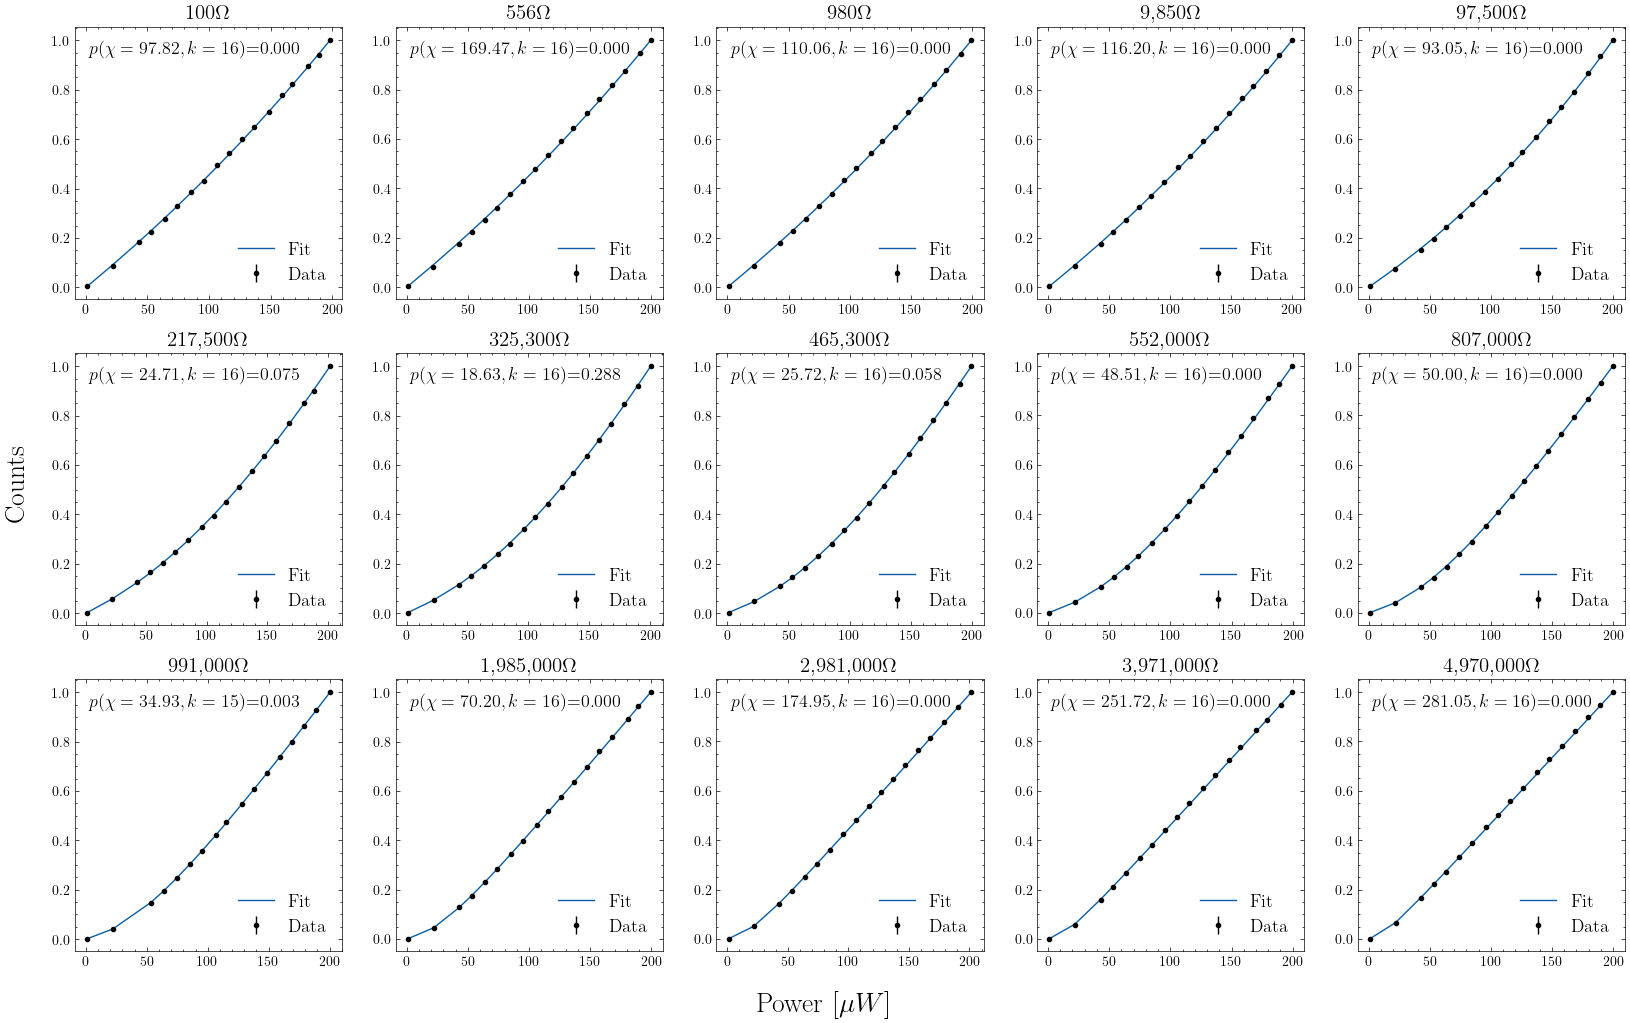

In [38]:
plot_all_activation_fits(fit_inputs_fk, fit_outputs_fk, resistances, outliers)

In [49]:
linspace = np.linspace(powerlist[0], powerlist[-1], 1100)
derivs = []
max_derivs = []
max_nl_power = []
for idx, fit_output in enumerate(fit_outputs_fk[:-2]):
    fit_func = fit_inputs_fk[idx].fit_func
    deriv = np.gradient(np.gradient(fit_func(linspace, *fit_output.parameters), linspace,edge_order=2), linspace,edge_order=2)
    derivs.append(deriv)
    max_derivs.append(np.max(deriv))
    max_nl_power.append(linspace[np.argmax(deriv)])
derivs = np.array(derivs)
max_derivs = np.array(max_derivs) / np.max(max_derivs)

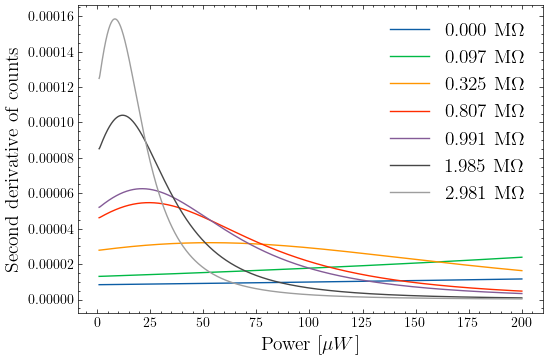

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i in [0, 4, 6, 9, 10, 11, 12]:
    ax.plot(linspace, derivs[i], label=fr"{resistances[i] * 1e-6:.3f} M$\Omega$")

ax.set_xlabel(r"Power [$\mu W$]", fontsize=14)
ax.set_ylabel("Second derivative of counts", fontsize=14)
plt.legend(fontsize=14, frameon=False)

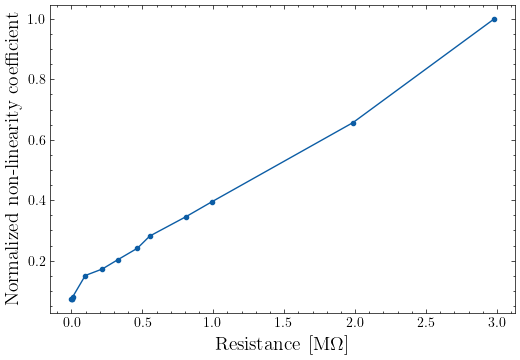

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_xlabel(r"Resistance [M$\Omega$]", fontsize=14)
ax.set_ylabel("Normalized non-linearity coefficient", fontsize=14)
ax.plot(resistances[:-2] * 1e-6, max_derivs, '.-')

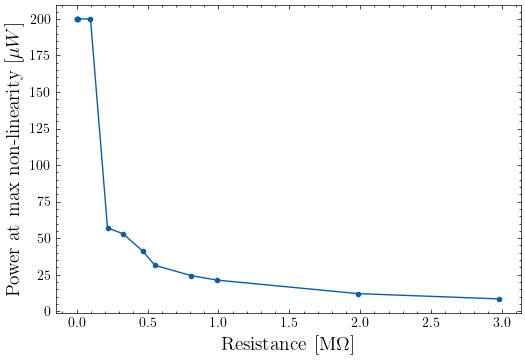

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_xlabel(r"Resistance [M$\Omega$]", fontsize=14)
ax.set_ylabel("Power at max non-linearity [$\mu W$]", fontsize=14)
ax.plot(resistances[:-2] * 1e-6, max_nl_power, '.-')